# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [13]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        17:14:05   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

Text(0.5, 1.0, 'Residuos - modelo simples')

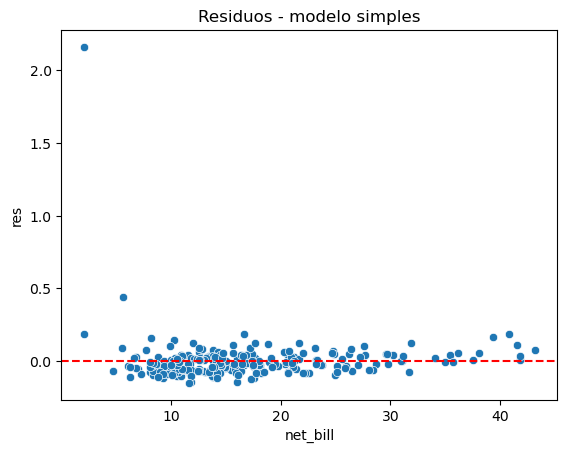

In [28]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos - modelo simples")

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.62e-13
Time:                        17:14:20   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

Text(0.5, 1.0, 'Residuos - logaritmo no x')

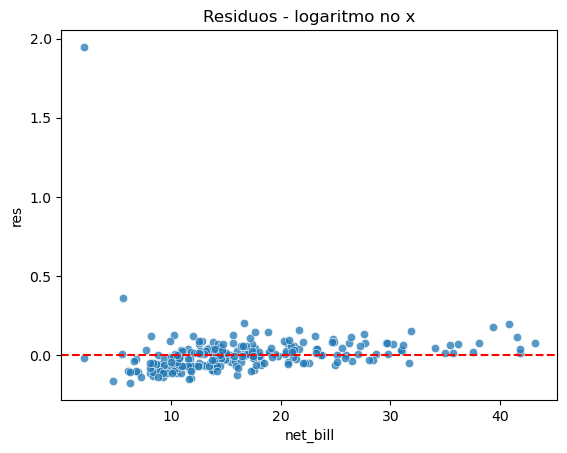

In [29]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos - logaritmo no x")

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.06e-09
Time:                        17:14:35   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

Text(0.5, 1.0, 'Residuos - polinômio no x')

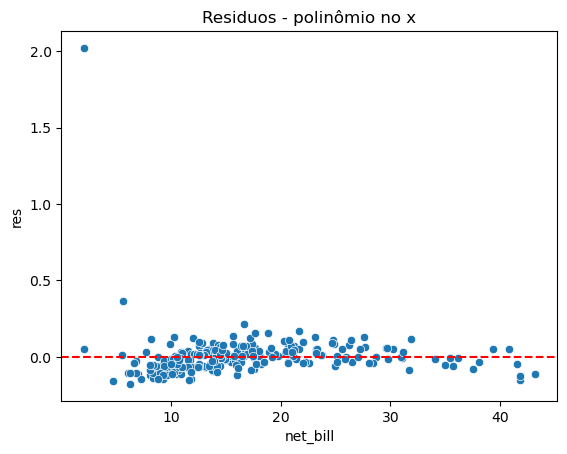

In [30]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuos - polinômio no x")

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           8.27e-16
Time:                        12:29:16   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

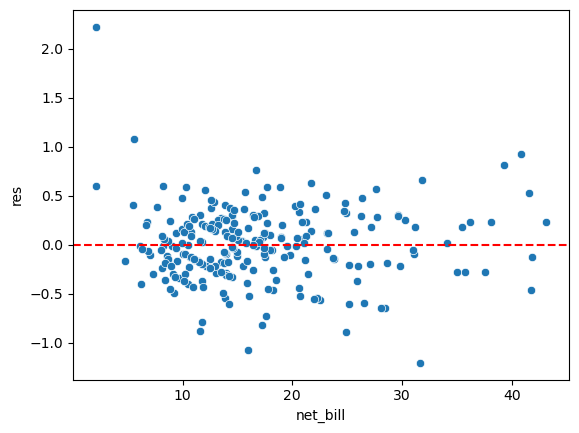

In [35]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [36]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2
print(r2)

0.11440988592529779


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.20e-20
Time:                        12:23:45   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

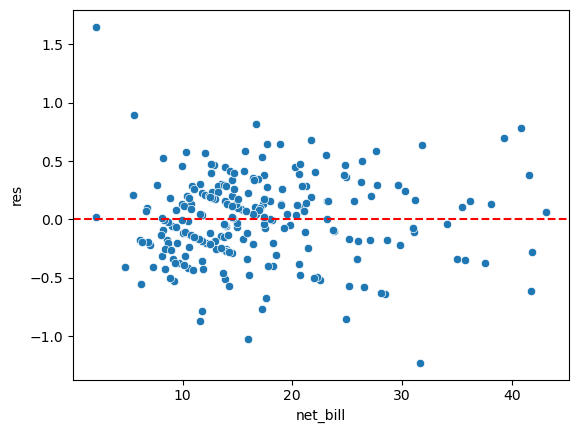

In [33]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2
print(r2)

0.30894874740322265


###  6. qual modelo resultou no melhor ajuste?

In [ ]:
#O último modelo possui um gráfico de resíduos melhor distribuído, sem padrão, e o R² calculado é o maior, em torno de 0,30. 